**CO-OCCURRENCE MATRIX & CONTRAST:**

1. CALCULATE THE CO-OCCURRENCE MATRIX

[[  449    17    12     9    14    13    15     8    11    10    10    12    12    14    11     9     8     5     4     6     3     7     2     4     6     2     2     2     2     3     1     1     2     1     5     2     0     0     1     1     0     2     0     1     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     1     0     0     0     0     0     1     0     0     0     0     0     0     0     0     1     1     0     1     0     0     0     0     0     2     1     2     4     1     0     3     3     2     1     9     5     2     3     2     3     9    10     2     5     2     3     6     3     2     2     2     2     1     3     2     2     4     0     1     2     1     1     1     0     0     1     0     0     0     0     0     0     0     1     0     1     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0   

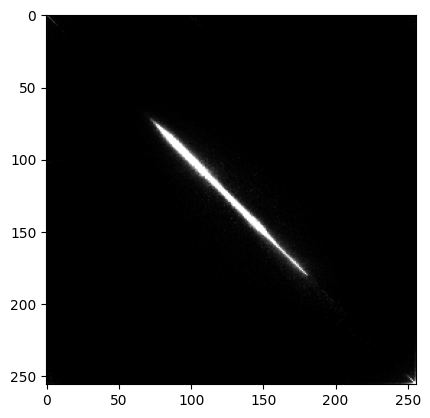

In [16]:
#THIS CELL TO CALCULATE THE CO-OCCURRENCE MATRIX

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def CalculateCoOccurrence(image_path):
    # Load the grayscale image
    image = Image.open(image_path).convert("L")
    image_array = np.array(image)

    # Get the dimensions of the image
    height, width = image_array.shape

    # Initialize the co-occurrence matrix
    North = 256
    South = 256
    co_occurrence_matrix = np.zeros((North, South), dtype=int)

    # Calculate co-occurrence matrix using North/South orientation
    for i in range(height):
        if i == height-1:
            break
        for j in range(width):
            pixel = image_array[i,j]
            neighbor = image_array[i+1,j]
            co_occurrence_matrix[pixel,neighbor] += 1

    return co_occurrence_matrix

#Testing:
image_path = "Images\Image4.png" #PUT THE NUMBER OF THE IMAGE YOU WANT TO LOAD HERE
resulting_matrix = CalculateCoOccurrence(image_path)
np.set_printoptions(threshold=np.inf, linewidth=np.inf)
print(resulting_matrix)

image_from_matrix = Image.fromarray(resulting_matrix)

# Display the image
plt.figure()
plt.imshow(image_from_matrix, cmap='gray')


In [3]:
# #Testing for the Example in Lecture

# import numpy as np
# from PIL import Image

# # Create a 4x5 2D array
# image_array2 = [
#     [4, 6, 8, 5, 4],
#     [5, 5, 8, 7, 7],
#     [6, 7, 7, 7, 9],
#     [8, 8, 4, 8, 6],
#     [9, 8, 9, 5, 6]
# ]

# # Define the dimensions matching the actual size of image_array2
# North2 = 10
# South2 = 10

# co_occurrence_matrix2 = np.zeros((North2, South2), dtype=int)

# for i in range(5):
#     if i == 4:
#         break
#     for j in range(5):
#         pixel = image_array2[i][j]
#         neighbor = image_array2[i+1][j]
#         co_occurrence_matrix2[pixel][neighbor] += 1

# np.set_printoptions(threshold=np.inf, linewidth=np.inf)
# print(co_occurrence_matrix2)

2. CALCULATE CONTRAST

In [4]:
#THIS CELL TO CALCULATE THE CONTRAST

def CalculateContrast(np_array):
    contrast_numerator=0
    for i in range(256):
        for j in range(256):
            contrast_numerator+=resulting_matrix[i,j]*abs(i-j)



    contrast_denominator=0
    for i in range(256):
        for j in range(256):
            contrast_denominator+=abs(i-j)


    contrast=contrast_numerator/contrast_denominator

    return contrast
print_contrast=CalculateContrast(resulting_matrix)
print("Contrast: ",print_contrast)

Contrast:  0.35504352397573813


**CALCULATE HISTOGRAMS:**

1. CALCULATE IMAGE HISTOGRAM

[913, 195, 241, 178, 180, 166, 120, 120, 83, 73, 70, 90, 74, 60, 59, 39, 51, 48, 32, 35, 29, 35, 34, 27, 26, 19, 25, 16, 18, 13, 14, 12, 7, 4, 11, 15, 4, 9, 4, 10, 3, 11, 8, 9, 3, 14, 7, 3, 5, 6, 8, 6, 9, 15, 21, 15, 23, 13, 24, 23, 23, 32, 47, 54, 54, 64, 60, 77, 130, 128, 163, 200, 328, 411, 579, 712, 1104, 1550, 2164, 2355, 3489, 4746, 5594, 8847, 10135, 10781, 13831, 16584, 19926, 23324, 23057, 27401, 30650, 31253, 31376, 34391, 42191, 40482, 50624, 53946, 57098, 49521, 44853, 49408, 43566, 47128, 50399, 48347, 46887, 35283, 30401, 31381, 30025, 27213, 26045, 30833, 27098, 29439, 29830, 27316, 25431, 25119, 26969, 26073, 26441, 25356, 25798, 23535, 24299, 20246, 18132, 16531, 17862, 16589, 17279, 14865, 14372, 16053, 16737, 19196, 20404, 24528, 23849, 28748, 31402, 30019, 31063, 31952, 29751, 19854, 12779, 7543, 5817, 4292, 3602, 3903, 3848, 3495, 2577, 2251, 2313, 3053, 1878, 2461, 2384, 2648, 2050, 2111, 2040, 2045, 2377, 2761, 3502, 2516, 2082, 2113, 1656, 1498, 1349, 1595, 763,

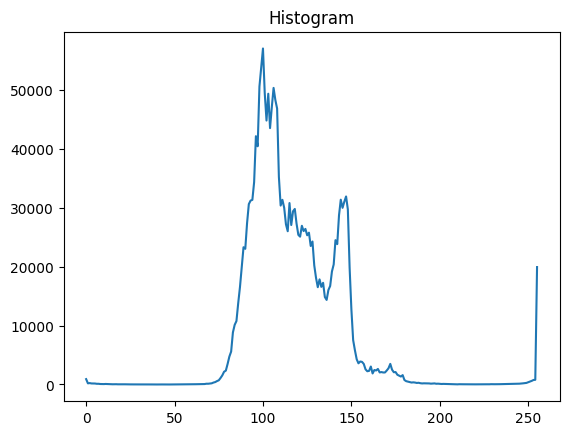

In [5]:
#THIS CELL TO CALCULATE THE IMAGE HISTOGRAM

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

img = Image.open("Images/Image4.png").convert('L')


img_array = np.array(img)

# histogram and cumulative histogram


#histogram
def CalculateHistogram(img_array):
    intensity_counts = [0] * 256  # initialize a list of 256 zeros
    for i in range(img_array.shape[0]):
        for j in range(img_array.shape[1]):
            intensity = img_array[i][j]
            intensity_counts[intensity] += 1

    return intensity_counts

Image_histogram=CalculateHistogram(img_array)
print(Image_histogram)
plt.figure()
plt.plot(range(256), Image_histogram)
plt.title('Histogram')

plt.show()

2. CALCULATE CUMULATIVE HISTOGRAM

[913, 1108, 1349, 1527, 1707, 1873, 1993, 2113, 2196, 2269, 2339, 2429, 2503, 2563, 2622, 2661, 2712, 2760, 2792, 2827, 2856, 2891, 2925, 2952, 2978, 2997, 3022, 3038, 3056, 3069, 3083, 3095, 3102, 3106, 3117, 3132, 3136, 3145, 3149, 3159, 3162, 3173, 3181, 3190, 3193, 3207, 3214, 3217, 3222, 3228, 3236, 3242, 3251, 3266, 3287, 3302, 3325, 3338, 3362, 3385, 3408, 3440, 3487, 3541, 3595, 3659, 3719, 3796, 3926, 4054, 4217, 4417, 4745, 5156, 5735, 6447, 7551, 9101, 11265, 13620, 17109, 21855, 27449, 36296, 46431, 57212, 71043, 87627, 107553, 130877, 153934, 181335, 211985, 243238, 274614, 309005, 351196, 391678, 442302, 496248, 553346, 602867, 647720, 697128, 740694, 787822, 838221, 886568, 933455, 968738, 999139, 1030520, 1060545, 1087758, 1113803, 1144636, 1171734, 1201173, 1231003, 1258319, 1283750, 1308869, 1335838, 1361911, 1388352, 1413708, 1439506, 1463041, 1487340, 1507586, 1525718, 1542249, 1560111, 1576700, 1593979, 1608844, 1623216, 1639269, 1656006, 1675202, 1695606, 1720134,

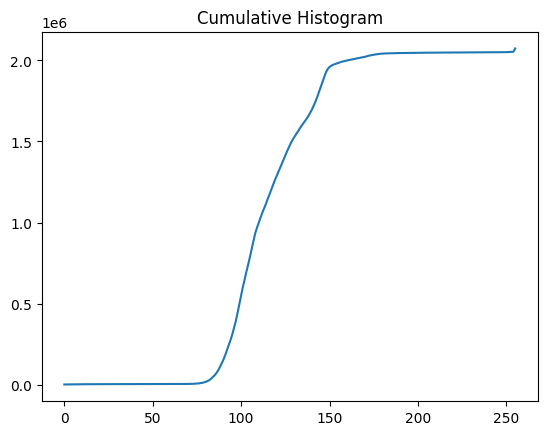

In [6]:
#THIS CELL TO CALCULATE THE CUMULATIVE HISTOGRAM
def CalculateCumulativeHistogram(intensity_counts):
    cumulative_counts = [0] * 256  # initialize a list of 256 zeros
    for i in range(256):
        cumulative_counts[i] = cumulative_counts[i-1] + intensity_counts[i]

    return cumulative_counts

Cumulative_Histogram=CalculateCumulativeHistogram(Image_histogram)
print(Cumulative_Histogram)
plt.figure()
plt.plot(range(256), Cumulative_Histogram)
plt.title('Cumulative Histogram')

plt.show()

3. CALCULATE COLOR COVERING PERCENTAGE

In [7]:
#THIS CELL TO CALCULATE THE COLOR COVERING PERCENTAGE

def GetColorAtPercentage(cumulative_histogram,percentage):
    color_percentage = [0] * 256  # initialize a list of 256 zeros

    for i in range(256):
        color_percentage[i] = (cumulative_histogram[i]/cumulative_histogram[255])*100
    x1 = 0
    x2 = 0
    for x in range(256):
        if color_percentage[x] >= percentage:
            x1 = x
            break
    for x in range(256-1,0,-1):
        if color_percentage[x] <= 100-percentage:
            x2 = x
            break
    return x1, x2

GetColorAtPercentage(Cumulative_Histogram,10)

(92, 146)

**MODIFY HISTOGRAMS**

1. CONTRAST STRETCHING

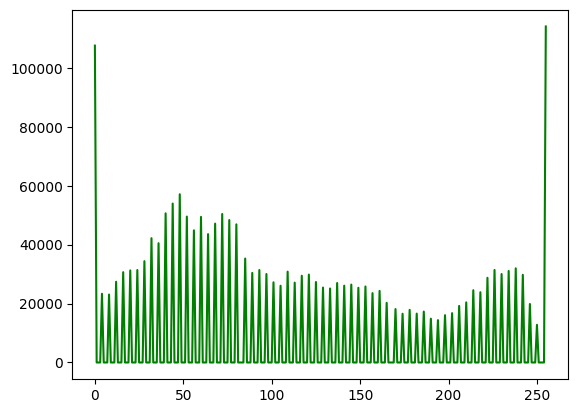

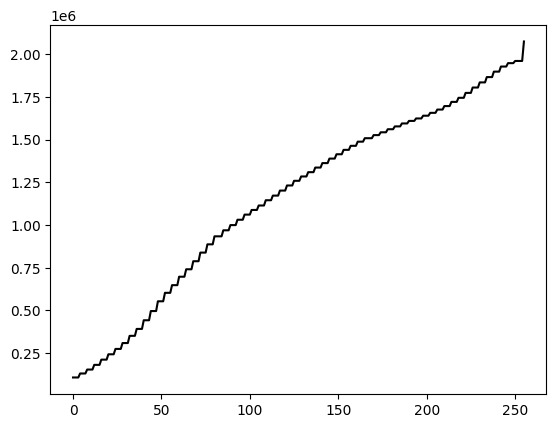

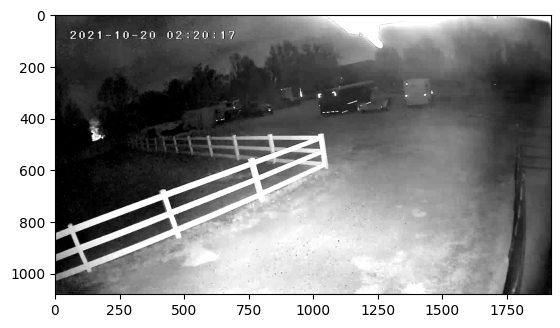

In [15]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


im= Image.open("Images/Image1.png").convert("L")
im2= Image.open("Images/Image2.png").convert("L")
im3= Image.open("Images/Image3.png").convert("L")
imtest= Image.open("Images/Image4.png").convert("L")



pixel_intensity = [0]*256 
cumulative_intensity = [0]*256


#plot the histogram
for pixel in imtest.getdata():
   
    intensity = pixel
    
    
    pixel_intensity[intensity] += 1

#plt.plot(range(256), pixel_intensity, color='blue')
#plt.show()


cumulative_sum = 0
for i in range(256):
    cumulative_sum += pixel_intensity[i]
    cumulative_intensity[i] = cumulative_sum




#plt.plot(range(256), cumulative_intensity, color='red')
#plt.show()



    # Open the image

im1_array = np.array(im)
im2_array = np.array(im2)
im3_array = np.array(im3)
imtest_array = np.array(imtest)
def ContrastStretching(im_array, a, b, c, d):
    for i in range(im_array.shape[0]):
        for j in range(im_array.shape[1]):
            if im_array[i][j] > d:
                im_array[i][j] = b
            elif im_array[i][j] < c:
                im_array[i][j] = a
            else:
                im_array[i][j] = (im_array[i][j] - c)*(b-a)/(d-c) + a
    #convert imtest_array to image
    imtest2 = Image.fromarray(imtest_array)
    pixel_intensity = [0]*256
    for pixel in imtest2.getdata():
    
        intensity = pixel
        
        
        pixel_intensity[intensity] += 1
    cumulative_intensity = [0]*256
    cumulative_sum = 0
    for i in range(256):
        cumulative_sum += pixel_intensity[i]
        cumulative_intensity[i] = cumulative_sum
    plt.plot(range(256), pixel_intensity, color='green')
    plt.show()
    plt.plot(range(256), cumulative_intensity, color='black')
    plt.show()
    return imtest2

plt.figure()
plt.imshow(ContrastStretching(imtest_array, 0, 255, 88, 151), cmap='gray')


2. HISTOGRAM EQUALIZATION

<Figure size 640x480 with 0 Axes>

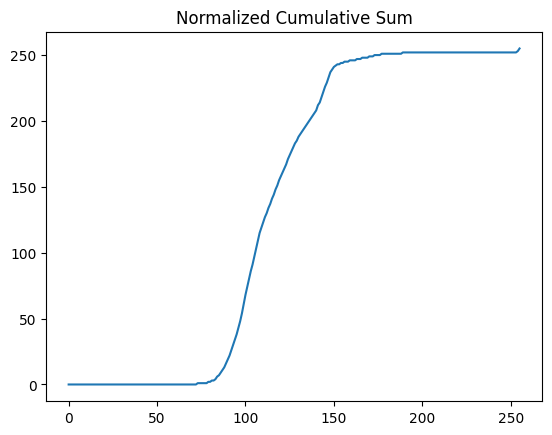

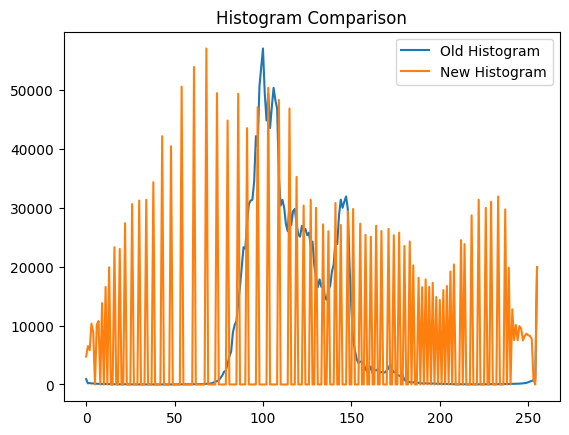

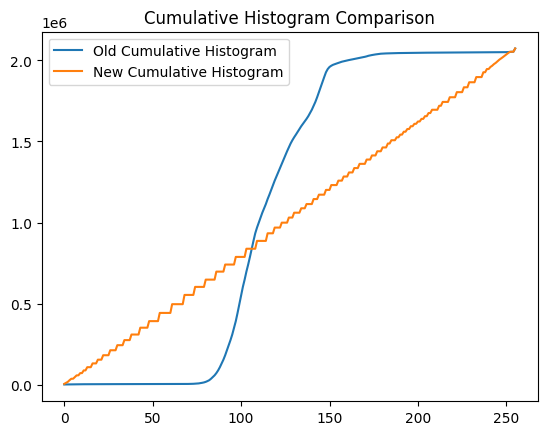

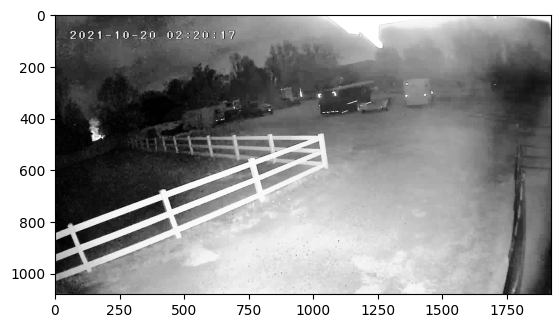

In [13]:
# histogram equalization
def HistogramEqualization(image_array, min_intensity, max_intensity):
    width, height = image_array.shape
    
    # histogram and cumulative histogram
    intensity_counts = CalculateHistogram(image_array)
    cumulative_counts = CalculateCumulativeHistogram(intensity_counts)
    color_percentage = [0] * 256    # initialize a list of 256 zeros
    total_pixels = width * height


   #normalization
    normalized_cumulative_sum = [0] * 256
    for i in range(256):
         normalized_cumulative_sum[i] =round((cumulative_counts[i] -  cumulative_counts[min_intensity]) * 255 / (cumulative_counts[max_intensity] - cumulative_counts[min_intensity]))
        
    
    plt.figure()
    plt.plot(range(256), normalized_cumulative_sum)
    plt.title('Normalized Cumulative Sum')


    # histogram equalization

    new_image = np.zeros_like(image_array)
    for y in range(height):
        for x in range(width):
            intensity = image_array[x][y]
            #new_intensity = min(max(round((cumulative_counts[intensity] -  cumulative_counts[min_intensity]) * 255 / (cumulative_counts[max_intensity] - cumulative_counts[min_intensity])),0),255)
            new_intensity = min(max(round(normalized_cumulative_sum[intensity]),0),255)
            
            new_image[x][y] = new_intensity
   
    final_image = Image.fromarray(new_image)
    
    #final_image = Image.new('L', (width, height))
    #final_image.putdata(new_image)
    

    # histogram of newimg
    new_intensity_counts = CalculateHistogram(new_image)
    new_cumulative_counts = CalculateCumulativeHistogram(new_intensity_counts)

    

    # plot old and new histograms

    plt.figure()
    plt.plot(range(256), intensity_counts, label='Old Histogram')
    plt.plot(range(256), new_intensity_counts, label='New Histogram')
    plt.title('Histogram Comparison')
    plt.legend()

    # plot old and new cumulative histograms
    plt.figure()
    plt.plot(range(256), cumulative_counts, label='Old Cumulative Histogram')
    plt.plot(range(256), new_cumulative_counts, label='New Cumulative Histogram')
    plt.title('Cumulative Histogram Comparison')
    plt.legend()

    plt.show()

    return final_image
imtest= Image.open("Images/Image4.png").convert("L")
imtest_array = np.array(imtest)
plt.figure()
plt.imshow(HistogramEqualization(imtest_array, 0, 255), cmap='gray')

3. GREY SCALE TRANSFORMATION

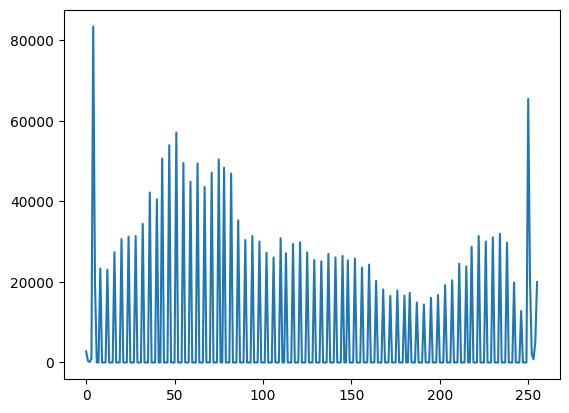

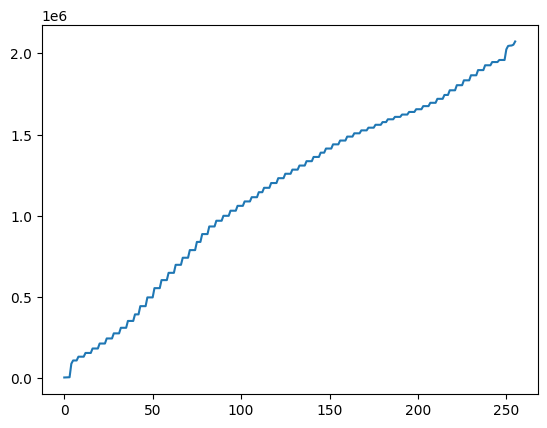

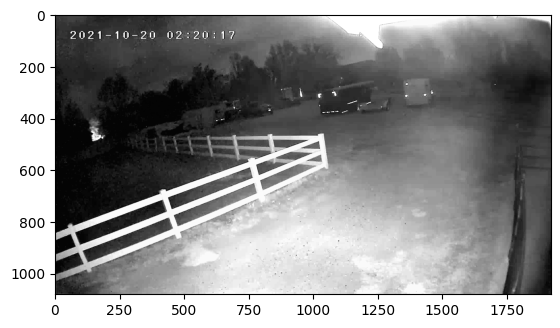

In [12]:
#THIS CELL TO DO GREY SCALE TRANSFORMATION

def GrayscaleTransformation(img_array, x1, y1, x2, y2):


    width, height = img_array.shape
    new_image = np.zeros_like(img_array)
    for y in range(height):
        for x in range(width):
            intensity = img_array[x][y]
            if intensity <= x1:
                new_intensity = (intensity * y1) / x1
            elif intensity > x1 and intensity <= x2:
                new_intensity = (((y2 - y1) / (x2 - x1)) * (intensity - x1)) + y1
            else:
                new_intensity = (((255 - y2) / (255 - x2)) * (intensity - x2)) + y2
            new_image[x][y] = new_intensity

    final_image = Image.fromarray(new_image)
    #final_image.putdata(new_image)

    return final_image

final_image = GrayscaleTransformation(img_array,88,5,151,250)
finalarr = np.array(final_image)
histogram = CalculateHistogram(finalarr)
cumulative_histogram = CalculateCumulativeHistogram(histogram)

plt.figure()
plt.plot(range(256), histogram, label='New Histogram')

plt.figure()
plt.plot(range(256), cumulative_histogram, label='New Cumulative Histogram')



plt.figure()
plt.imshow(final_image, cmap='gray')

plt.show()